In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df_treino = pd.read_csv("desafio_manutencao_preditiva_treino.csv")
df_teste = pd.read_csv("desafio_manutencao_preditiva_treino.csv")

In [6]:
df_treino[df_treino['failure_type'] != 'No Failure']

,udi,product_id,type,air_temperature_k,process_temperature_k,rotational_speed_rpm,torque_nm,tool_wear_min,failure_type
52,70,L47249,L,298.9,309.0,1410,65.7,191,Power Failure
56,78,L47257,L,298.8,308.9,1455,41.3,208,Tool Wear Failure
112,161,L47340,L,298.4,308.2,1282,60.7,216,Overstrain Failure
113,162,L47341,L,298.3,308.1,1412,52.3,218,Overstrain Failure
143,208,M15067,M,298.4,308.7,1421,60.7,119,Power Failure
...,...,...,...,...,...,...,...,...,...
6440,9665,L56844,L,299.1,310.2,1317,54.8,231,Overstrain Failure
6442,9668,L56847,L,299.2,310.3,1352,48.9,238,Overstrain Failure
6501,9759,L56938,L,298.6,309.8,2271,16.2,218,Tool Wear Failure
6537,9823,L57002,L,298.5,309.4,1360,60.9,187,Overstrain Failure


# Verificando a similaridade entre os datasets de treino e teste
Antes da análise exploratória de dados, é preciso verificar os tipos de variáveis, bem como as estatísticas principais dos datasets de treino e teste.

Como as estatísticas são muito similares, pode-se realizar a análise exploratória apenas nos dados de treino considerando que eles são uma amostra representativa da população.


In [7]:
df_treino.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6667 entries, 0 to 6666
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   udi                    6667 non-null   int64  
 1   product_id             6667 non-null   object 
 2   type                   6667 non-null   object 
 3   air_temperature_k      6667 non-null   float64
 4   process_temperature_k  6667 non-null   float64
 5   rotational_speed_rpm   6667 non-null   int64  
 6   torque_nm              6667 non-null   float64
 7   tool_wear_min          6667 non-null   int64  
 8   failure_type           6667 non-null   object 
dtypes: float64(3), int64(3), object(3)
memory usage: 468.9+ KB


In [8]:
df_treino.describe()

,udi,air_temperature_k,process_temperature_k,rotational_speed_rpm,torque_nm,tool_wear_min
count,6667.000000,6667.000000,6667.000000,6667.000000,6667.000000,6667.000000
mean,4994.589921,299.992515,309.992620,1537.419529,40.058512,108.098095
std,2896.125718,1.994710,1.488101,177.182908,9.950804,63.359915
min,1.000000,295.300000,305.700000,1168.000000,3.800000,0.000000
25%,2496.500000,298.300000,308.800000,1422.500000,33.200000,54.000000
50%,4983.000000,300.000000,310.000000,1503.000000,40.200000,108.000000
75%,7510.500000,301.500000,311.100000,1612.000000,46.800000,162.000000
max,10000.000000,304.500000,313.800000,2886.000000,76.600000,251.000000


In [9]:
df_teste.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6667 entries, 0 to 6666
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   udi                    6667 non-null   int64  
 1   product_id             6667 non-null   object 
 2   type                   6667 non-null   object 
 3   air_temperature_k      6667 non-null   float64
 4   process_temperature_k  6667 non-null   float64
 5   rotational_speed_rpm   6667 non-null   int64  
 6   torque_nm              6667 non-null   float64
 7   tool_wear_min          6667 non-null   int64  
 8   failure_type           6667 non-null   object 
dtypes: float64(3), int64(3), object(3)
memory usage: 468.9+ KB


In [10]:
df_teste.describe()

,udi,air_temperature_k,process_temperature_k,rotational_speed_rpm,torque_nm,tool_wear_min
count,6667.000000,6667.000000,6667.000000,6667.000000,6667.000000,6667.000000
mean,4994.589921,299.992515,309.992620,1537.419529,40.058512,108.098095
std,2896.125718,1.994710,1.488101,177.182908,9.950804,63.359915
min,1.000000,295.300000,305.700000,1168.000000,3.800000,0.000000
25%,2496.500000,298.300000,308.800000,1422.500000,33.200000,54.000000
50%,4983.000000,300.000000,310.000000,1503.000000,40.200000,108.000000
75%,7510.500000,301.500000,311.100000,1612.000000,46.800000,162.000000
max,10000.000000,304.500000,313.800000,2886.000000,76.600000,251.000000


# Análise Exploratória de Dados

A análise exploratória dos dados é importante para entender o formato dos dados, sua distribuição e como eles se relacionam, para poder escolher as melhores técnicas de processamento e o melhor algoritmo preditivo para o problema.

In [11]:
df_treino

,udi,product_id,type,air_temperature_k,process_temperature_k,rotational_speed_rpm,torque_nm,tool_wear_min,failure_type
0,1,M14860,M,298.1,308.6,1551,42.8,0,No Failure
1,2,L47181,L,298.2,308.7,1408,46.3,3,No Failure
2,5,L47184,L,298.2,308.7,1408,40.0,9,No Failure
3,6,M14865,M,298.1,308.6,1425,41.9,11,No Failure
4,7,L47186,L,298.1,308.6,1558,42.4,14,No Failure
...,...,...,...,...,...,...,...,...,...
6662,9995,L57174,L,298.8,308.3,1634,27.9,12,No Failure
6663,9996,M24855,M,298.8,308.4,1604,29.5,14,No Failure
6664,9997,H39410,H,298.9,308.4,1632,31.8,17,No Failure
6665,9999,H39412,H,299.0,308.7,1408,48.5,25,No Failure


## Divisão em variáveis categóricas e numéricas

Variáveis categóricas (que assumem diferentes classes) ou variáveis numéricas (sejam elas discretas ou contínuas) recebem diferentes tratamentos e análises, portanto é importante definir quais variáveis são categóricas e quais são numéricas.

A análise do tipo de variável depende do problema. Uma mesma informação pode ser representada de forma categórica ou numérica dependendo do problema em que ela está inserida.

In [12]:
# Quantidade de valores únicos em cada variável
df_treino.nunique()

udi                      6667
product_id               6667
type                        3
air_temperature_k          93
process_temperature_k      82
rotational_speed_rpm      840
torque_nm                 547
tool_wear_min             243
failure_type                6
dtype: int64

De acordo com a quantidade de valors únicos de cada variável, é possível estimar que as variáveis type e failure_type são variáveis categóricas, pois possuem poucos valores únicos, enquanto o restante das variáveis são numéricas. O dicionário de dados enviado juntamente ao desafio também confirma essa suspeita. Além de esclarecer que as variáveis udi e product_id são identificadores únicos.

In [13]:
# separando as variáveis em ids, categóricas e numéricas
ids = ['udi', 'product_id']
categorical = ['type', 'failure_type']
numerical = [col for col in df_treino.columns if col not in ids and col not in categorical]

In [14]:
df_treino[ids]

,udi,product_id
0,1,M14860
1,2,L47181
2,5,L47184
3,6,M14865
4,7,L47186
...,...,...
6662,9995,L57174
6663,9996,M24855
6664,9997,H39410
6665,9999,H39412


In [15]:
df_treino[categorical]

,type,failure_type
0,M,No Failure
1,L,No Failure
2,L,No Failure
3,M,No Failure
4,L,No Failure
...,...,...
6662,L,No Failure
6663,M,No Failure
6664,H,No Failure
6665,H,No Failure


In [16]:
df_treino[numerical]

,air_temperature_k,process_temperature_k,rotational_speed_rpm,torque_nm,tool_wear_min
0,298.1,308.6,1551,42.8,0
1,298.2,308.7,1408,46.3,3
2,298.2,308.7,1408,40.0,9
3,298.1,308.6,1425,41.9,11
4,298.1,308.6,1558,42.4,14
...,...,...,...,...,...
6662,298.8,308.3,1634,27.9,12
6663,298.8,308.4,1604,29.5,14
6664,298.9,308.4,1632,31.8,17
6665,299.0,308.7,1408,48.5,25


## Análise Univariada

Vamos analisar primeiramente cada variável separadamente.

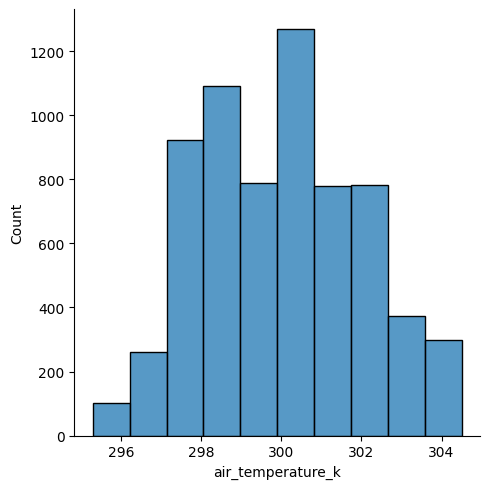

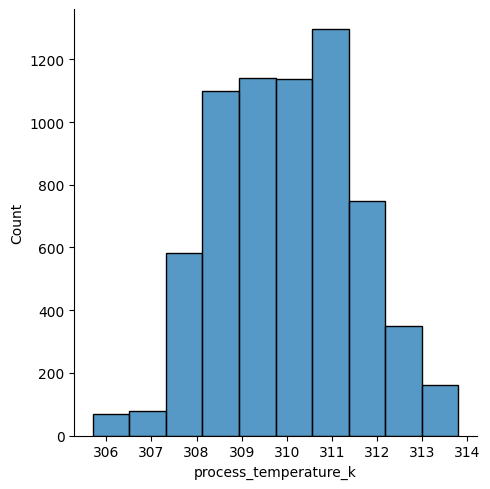

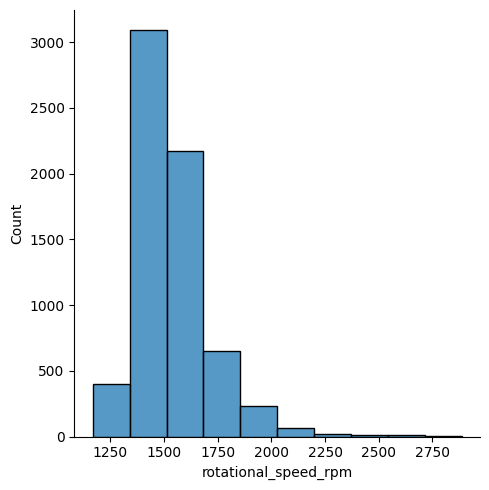

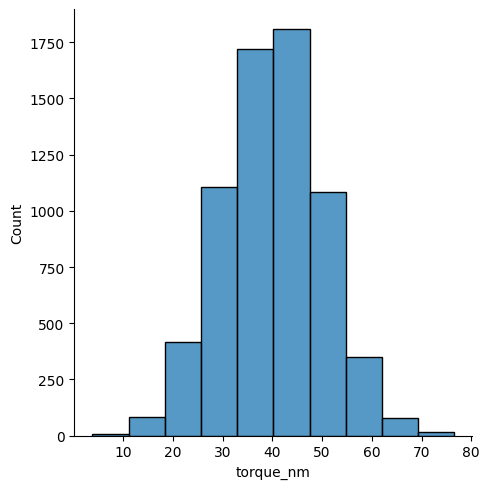

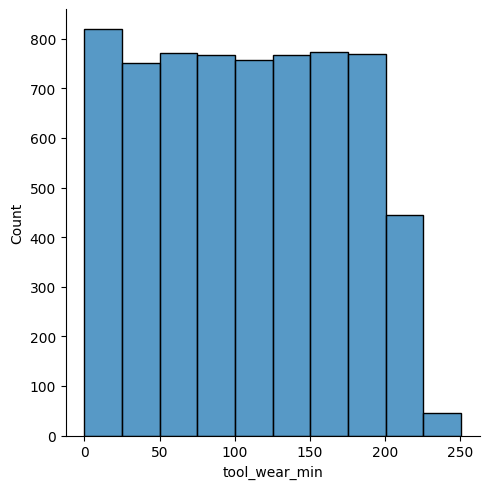

In [17]:
# Plot do histograma das variáveis
for col in numerical:
    sns.displot(df_treino, x=col, bins=10)

Pelos histogramas, verifica-se que as variáveis air_temperature_k, process_temperature_k, rotational_speed_rpm e torque_nm são aproximadamente normais. Além disso a variável rotational_speed_rpm tem uma assimetria positiva, tendo uma cauda mais alongada à direita.

Já a variável tool_wear_min tem distribuição aproximadamente uniforme, mas com os valores mais altos tendo menor frequência.

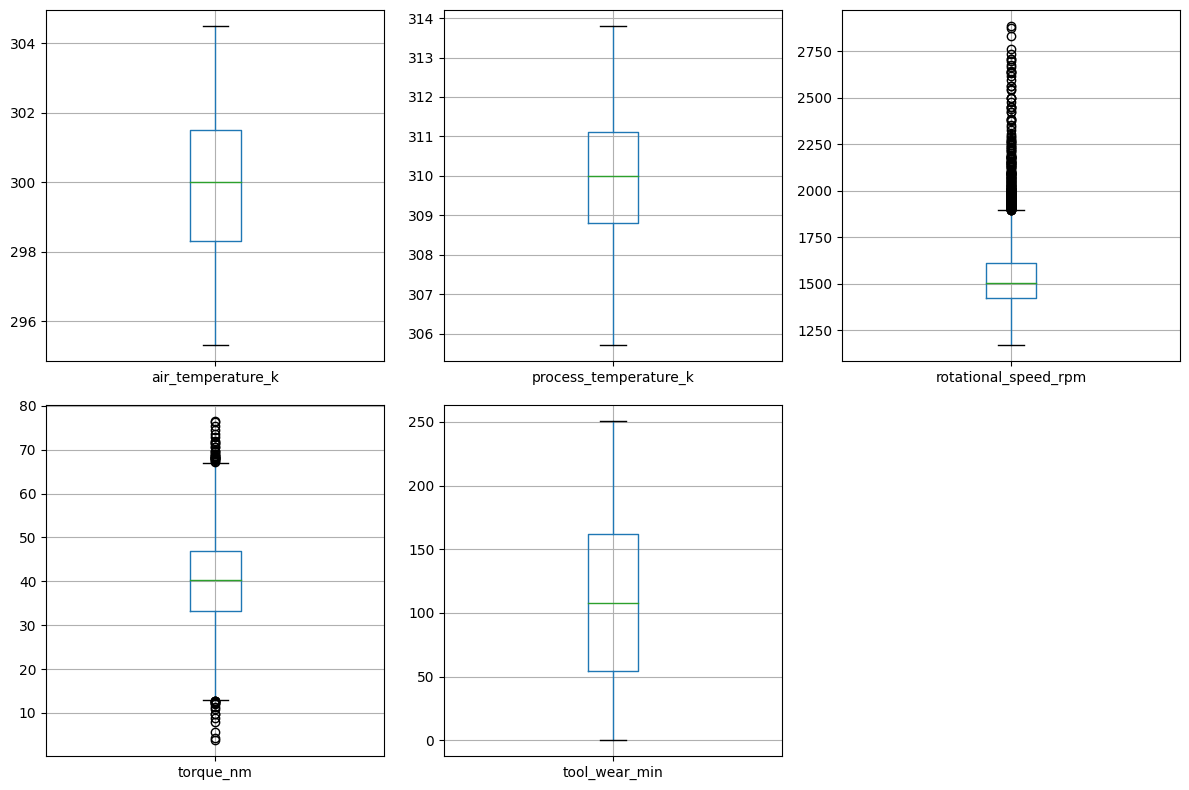

In [18]:
# Boxplot das variáveis numéricas

# Tamanho da área de plotagem
fig = plt.figure(figsize = (12,8))

# Loop pelas variáveis contínuas
for i,col in enumerate(numerical):
    plt.subplot(2,3,i+1);
    df_treino.boxplot(col);
    plt.tight_layout()

Do boxplot podemos tirar algumas informações. Por exemplo, a linha verde representa a mediana da variável. 
Assim, temos as medianas: 

| Variável | Mediana |
|--- |--- |
| air_temperature_k | 300 |
| process_temperature_k | 310 |
| rotational_speed_rpm | 1500 |
| torque_nm | 40 |
| tool_wear_min | 110 |

Essas medianas também podem ser vistas utilizando o método describe().

Além disso, as linhas azuis superior e inferior que delimitam o boxplot representam o terceiro e o primeiro quartil, respectivamente. As linhas pretas superior e inferior delimitam os valores máximos e mínimos nos dados.

Já os círculos pretos acima ou abaixo das linhas pretas representam _outliers_, valores que são significativamente diferentes do restante dos dados.

A análise dos boxplots revela que as variáveis rotational_speed_rpm e torque_nm possuem valores _outliers_, isso pode ser um problema na hora de construir o modelo preditivo. Vamos tratar disso mais adiante.

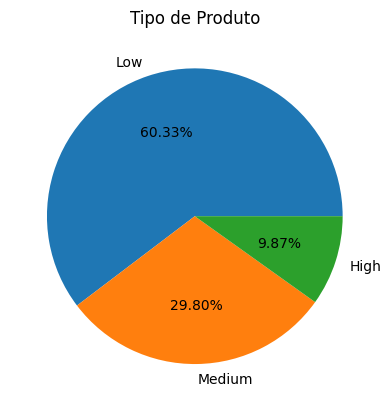

In [19]:
# Pie Chart do tipo de produto (variantes de qualidade)
labels = ['Low', 'Medium', 'High']
plt.pie(df_treino['type'].value_counts(), labels = labels, autopct = '%.2f%%')
plt.title('Tipo de Produto');

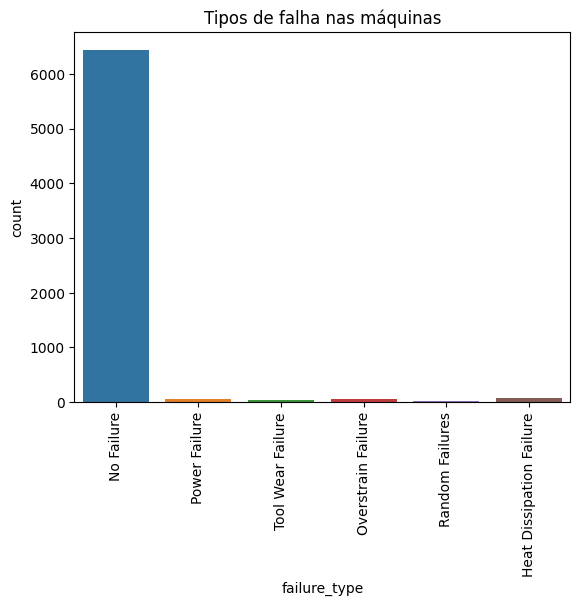

In [20]:
sns.countplot(data = df_treino, x='failure_type')
plt.xticks(rotation=90)
plt.title('Tipos de falha nas máquinas');

A maior parte das máquinas não apresenta falhas, vamos analisar a quantidade de cada um dos tipos de falha apenas para aquelas que apresentam falhas.

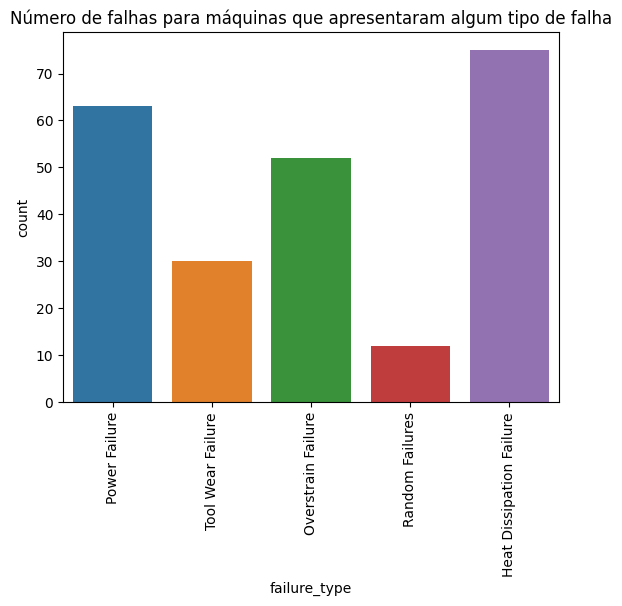

In [21]:
sns.countplot(data = df_treino.loc[df_treino['failure_type'] != 'No Failure'], x='failure_type')
plt.xticks(rotation=90)
plt.title('Número de falhas para máquinas que apresentaram algum tipo de falha');

Vê-se que o tipo mais comum de falha é por falha de dissipação de calor, enquanto as falhas aleatórias são as menos comuns.

## Verificando a correlação entre as variáveis numéricas

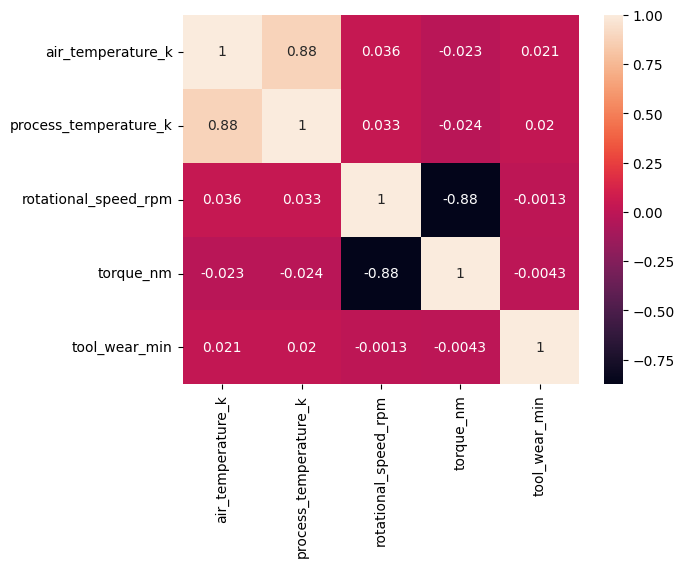

In [22]:
# Matriz de correlação
corr = df_treino[numerical].corr()

# Heatmap plot
sns.heatmap(corr, annot = True);

Verifica-se uma alta correlação positiva entre as variáveis air_temperature_k e process_temperature_k, além de uma alta correlação negativa entre as variáveis rotational_speed_rpm e torque_nm. Esses valores indicam uma possível multicolinearidade entre as variáveis, isto é, esses pares de variáveis podem conter informações muito similares, e talvez seja ideal manter apenas uma ou outra delas. Isso depende também do algoritmo de classificação escolhido. 

Voltaremos a esse problema mais a frente.



In [23]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Calculate the VIF for each column
vif = [variance_inflation_factor(df_treino[numerical].values, i) for i in range(df_treino[numerical].shape[1])]

# Print the result
for i, v in enumerate(vif):
    print(f"VIF for column {df_treino[numerical].columns[i]} is {v:.2f}")

VIF for column air_temperature_k is 88151.94
VIF for column process_temperature_k is 88961.61
VIF for column rotational_speed_rpm is 325.22
VIF for column torque_nm is 73.19
VIF for column tool_wear_min is 3.91


## Verificando a quantidade e proporção de tipos de produto (L, M ou H) por tipos de falha (variável target)

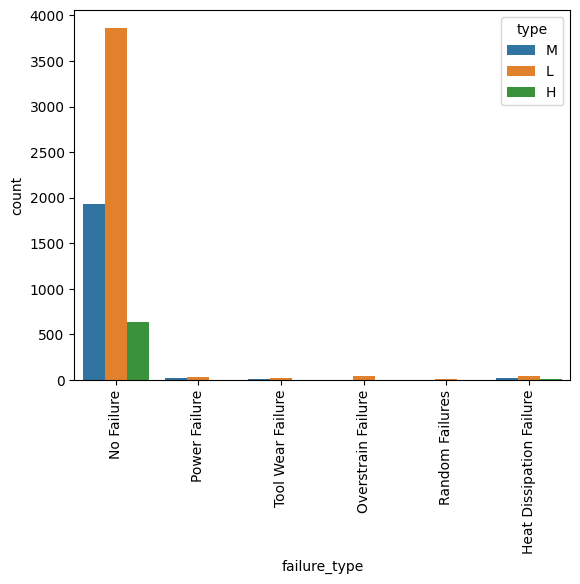

In [24]:
sns.countplot(df_treino, hue='type', x='failure_type')
plt.xticks(rotation = 90);

A quantidade significativamente maior de máquinas sem falha não nos permite verificar com precisão se há uma diferença na proporção de um certo tipo de falha para cada tipo de produto (L, M ou H). Portanto, podemos fazer uma tabela cruzada de tipo de falha por tipo de produto e calculando um valor percentual.

In [25]:
pd.crosstab(df_treino['failure_type'], df_treino['type']).apply(lambda x: x/x.sum(), axis=1)

type,H,L,M
failure_type,,,
Heat Dissipation Failure,0.093333,0.613333,0.293333
No Failure,0.099611,0.600000,0.300389
Overstrain Failure,0.019231,0.961538,0.019231
Power Failure,0.063492,0.619048,0.317460
Random Failures,0.333333,0.583333,0.083333
Tool Wear Failure,0.033333,0.633333,0.333333


Na tabela acima, estão listadas as proporções para cada tipo de falha. De acordo com o dicionário de dados, as proporções são de 50% de produtos L, 30% de produtos M e 20% de produtos H. Mas como já verificado no Pie Chart da análise univariada, a proporção verdadeira é de 60% de produtos L, e 10% de produtos H. Já o M é 30% como o dicionário coloca.

Considerando essas proporções, vemos que existe uma diferença significativa apenas para a falha do tipo "Overstrain", em que os produtos de qualidade inferior costumam apresentar esse tipo de falha mais do que os produtos de qualidade média e alta.

Vamos verificar essa diferença de forma gráfica.

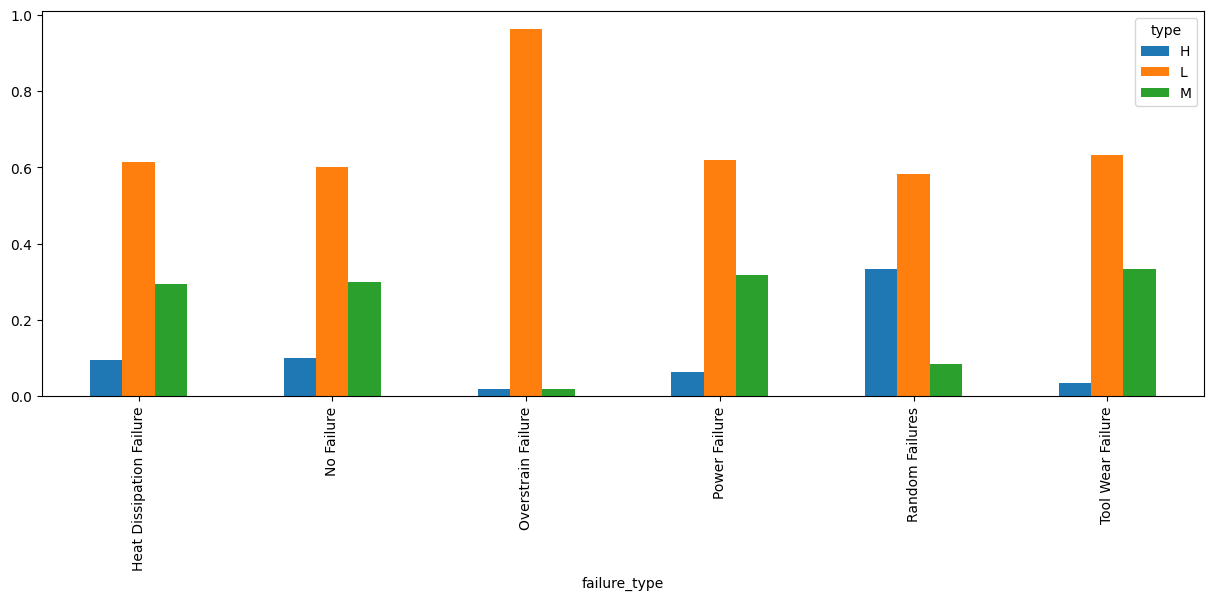

In [26]:
pd.crosstab(df_treino['failure_type'], df_treino['type']).apply(lambda x: x/x.sum(), axis=1).plot(kind = 'bar', 
                                                   figsize = (15, 5));

# Verificando se há valores missing

Conjuntos de dados podem apresentar valores missing, isto é, valores inválidos para aquele tipo de variável ou que faltam informação. Para esses casos é preciso fazer algum tipo de tratamento, como remover as linhas em que ocorrem os valores missing or utilizar alguma técnica de imputação.

Vamos verificar se há valores missing ou com algum valor inesperado de acordo com o dicionário de dados.

In [27]:
df_treino.isna().sum()

udi                      0
product_id               0
type                     0
air_temperature_k        0
process_temperature_k    0
rotational_speed_rpm     0
torque_nm                0
tool_wear_min            0
failure_type             0
dtype: int64

Não há valores NaN no conjunto de dados. No entanto, podem haver valores inesperados para as variáveis, verificaremos isso utilizando value_counts para cada variável.

In [28]:
df_treino['type'].value_counts()

L    4022
M    1987
H     658
Name: type, dtype: int64

In [29]:
df_treino['air_temperature_k'].value_counts()

300.7    176
300.5    160
298.8    155
298.9    149
298.2    148
        ... 
304.4      5
296.0      3
295.3      2
295.4      2
304.5      1
Name: air_temperature_k, Length: 93, dtype: int64

In [30]:
df_treino['process_temperature_k'].value_counts()

310.6    205
308.5    180
310.7    177
310.8    177
310.5    170
        ... 
306.9      2
305.8      2
306.7      2
305.7      1
313.8      1
Name: process_temperature_k, Length: 82, dtype: int64

In [31]:
df_treino['rotational_speed_rpm'].value_counts()

1452    33
1479    31
1429    30
1450    29
1469    28
        ..
1985     1
2305     1
1865     1
1978     1
1947     1
Name: rotational_speed_rpm, Length: 840, dtype: int64

In [32]:
df_treino['torque_nm']

0       42.8
1       46.3
2       40.0
3       41.9
4       42.4
        ... 
6662    27.9
6663    29.5
6664    31.8
6665    48.5
6666    40.2
Name: torque_nm, Length: 6667, dtype: float64

In [33]:
df_treino['tool_wear_min']

0        0
1        3
2        9
3       11
4       14
        ..
6662    12
6663    14
6664    17
6665    25
6666    30
Name: tool_wear_min, Length: 6667, dtype: int64

In [34]:
df_treino['failure_type']

0       No Failure
1       No Failure
2       No Failure
3       No Failure
4       No Failure
           ...    
6662    No Failure
6663    No Failure
6664    No Failure
6665    No Failure
6666    No Failure
Name: failure_type, Length: 6667, dtype: object

Não há valores missing no conjunto de dados, então podemos seguir confortavelmente para a próxima etapa, o pré-processamento de dados.